<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2.4 Maximum Likelihood Estimation**

##**2.4.1 MLE for Random Samples**
Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function.

**Definition 2.4.1** Let *X$_{1}$, X$_{2}$,...,X$_{n}$* have joint pmf or pdf
\begin{align}
f(x_1,x_2,...,x_n;θ_1,...,θ_m)
\end{align}
where the parameters θ$_{1}$,...,θ$_{m}$ have unknown values. When *x$_{1}$,...,x$_{n}$* are the observed sample values and the definition above is regarded as a function of θ$_{1}$,...,θ$_{m}$, it is called the likelihood function. The maximum likelihood estimates (male's) $\hat{θ_{1}}$,...,$\hat{θ_m}$ are those values of the θ$_{i}$'s that maximize the likelihood function so that
\begin{align}
f(x_1,...,x_n;\hat{θ_1},...,\hat{θ_m}) ≥ f(x_1,...,x_n;θ_1,...,θ_m)
\text{ for all } θ_{1},...,θ_{m}
\end{align}
When the *X$_{i}$*'s are substituted in place of the *x$_{i}$*'s the maximum likelihood estimators result.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels import api
from scipy import stats
from scipy.optimize import minimize

# generate an independent variable
x = np.linspace(-10, 30, 100)
# generate a normally distributed residual
e = np.random.normal(10, 5, 100)
# generate ground truth
y = 10 + 4*x + e
df = pd.DataFrame({'x':x, 'y':y})
df.head()

,x,y
0,-10.000000,-20.816669
1,-9.595960,-19.813543
2,-9.191919,-17.995139
3,-8.787879,-15.182649
4,-8.383838,-15.382236


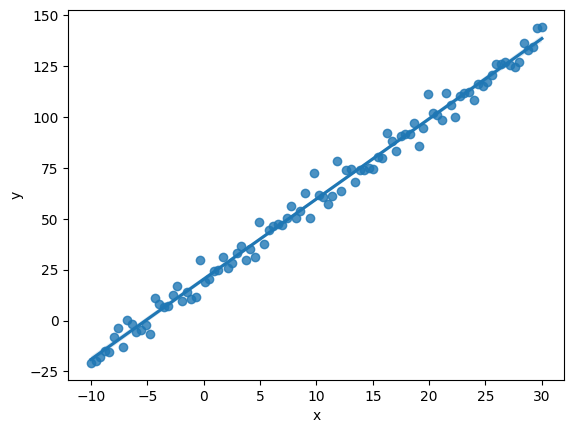

In [4]:
# Normalize distribution data
sns.regplot(x='x', y='y', data = df)
plt.show()

In [7]:
# Solve by MLE
def MLE_Norm(parameters) :
  const, beta, std_dev = parameters
  pred = const + beta*x

  LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
  neg_LL = -1*LL
  return neg_LL

In [8]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 294.36862786925565
        x: [ 2.033e+01  3.941e+00  4.594e+00]
      nit: 31
      jac: [ 1.137e-05  1.990e-04  0.000e+00]
     nfev: 232
     njev: 58
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

**2.4.2 Linear Regression**
Given input data points {(**x$_{i}$**,y$_{i}$)}$_{i=1}^{n}$, we seek an affine function to fit the data and each **x$_{i}$** = (x$_{i1}$,...,x$_{ip}$). The common approach involves finding coefficients β$_{j}$, *j* = 1,...,*p*'s that minimize the criterion
\begin{align}
∑_{i=1}^{n}(y_i-\hat{y_i})^2
\end{align}
where
\begin{align}
\hat{y_i} = β_0 + β_{1}x_{i1} + ... + β_{p}x_{ip}
\end{align}

In [9]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)
N = 200
beta_0 = 1
beta_1 = 0.5
e_sd = 0.5

x = np.linspace(start = -10, stop = 10, num = N)
e = np.random.normal(loc = 0, scale = e_sd, size = len(x))
y = beta_0 + beta_1*x + e
y_cond_exp = beta_0 + beta_1*x
# Fit data
plot_at = [-5, 0, 5]

In [13]:
from scipy.stats import norm

def sideways_dnorm(where_x, where_y, e_var, magnify=4):
    values = np.arange(start = -2, stop = 2.1, step = 0.1) # calculate
    # Y|X - Normal(XB, sigma^2)
    # (Y - XB)|X - Normal(0, sigma^2)
    dens = norm.pdf(x = values, loc = 0, scale = np.sqrt(e_var))
    x = where_x + dens*np.array(magnify)
    y = where_y + values
    return(np.vstack((x, y)))

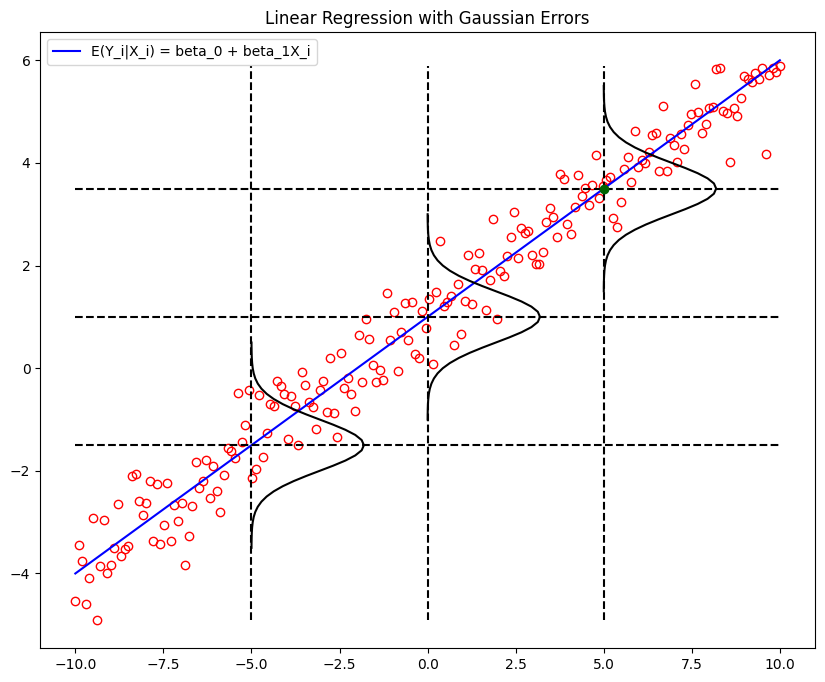

In [12]:
plt.figure(num = 4, figsize = (10, 8))
plt.plot(x, y, linestyle = "None", marker = "o",
         color = "red", markerfacecolor = 'None')
plt.title("Linear Regression with Gaussian Errors")

plt.plot(x, y_cond_exp, linestyle = "-", color = "blue",
         label = "E(Y_i|X_i) = beta_0 + beta_1X_i")
for i in range(0, len(plot_at)):
  y_fit = beta_0 + beta_1 * plot_at[i]
  xy = sideways_dnorm(where_x = plot_at[i],
                      where_y = y_fit,
                      e_var = e_sd**2,
                      magnify = 4)
  plt.plot(xy[0], xy[1], linestyle = "-", color = "black")
  plt.hlines(y = y_fit, linestyle = "--",
             color = "black", xmin = min(x), xmax = max(x))
  plt.vlines(x = plot_at[i], linestyle = "--",
                color = "black", ymin = min(y), ymax = max(y))
plt.plot(plot_at[i], y_fit, linestyle = "None",
             marker = "o", color = "darkgreen")
plt.legend()
plt.show()